## Ejemplo: Optimización de la función Booth $f(\mathbf{x})=(x_0+2z_1-7)^2+(2x_0+x_1-5)^2$ con Descenso de Gradiente

In [ ]:
import numpy as np
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [67]:

# función Booth (un solo óptimo global, diferenciable)
def booth(X):
    
    return (X[0]+2*X[1]-7)**2+(2*X[0]+X[1]-5)**2

# Derivada de Booth
def dbooth(X):
    
    #d f/ d x
    pd1 = 2*(X[0]+2*X[1]-7)*1+2*(2*X[0]+X[1]-5)*2
    
    #d f/ d y
    pd2 = 2*(X[0]+2*X[1]-7)*2+2*(2*X[0]+X[1]-5)*1
    
    return np.array([pd1,pd2])

def hbooth(X):
    
    
    #2da Derivada parcial \partial f/ \partial x^2_1
    dx1x1 = 10
    
    #2da Derivada parcial \partial f/ \partial x_1 x_2
    dx1x2 = 8
    
    dx2x2 = 8+2
    
    #Tenemos la información suficiente para crear la matriz Hessiana ya que es simétrica.
    
    M = np.array([[dx1x1,dx1x2],[dx1x2,dx2x2]])
    
    return M


#una función que envuelve boot para usarla directamente con las funciones de matplotlib
def wrapBooth(x,y):

    X = [x,y]
    return booth(X)



In [68]:
#rango
r_min,r_max = -10, 10

#ejes
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

#malla de valores evaluados por f(x,y)
x, y = np.meshgrid(xaxis, yaxis)

#evaluacion de los valores en la malla
results = wrapBooth(x, y)

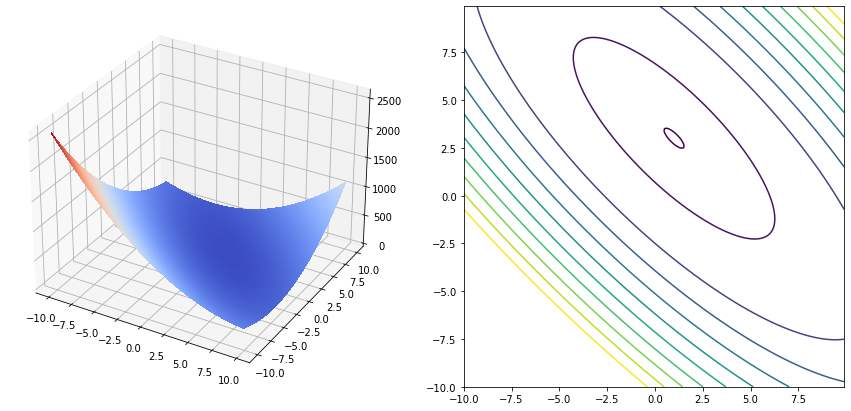

In [69]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

surf = ax.plot_surface(x, y, results, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo

ax.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])

plt.show()

In [99]:
X_0 = np.array([-7.5,5]).T

g = dbooth(X_0)

h = hbooth(X_0)

X_0 = X_0 - (g.T@g/(g.T@h@g))*g

array([-7.5,  5. ])

In [87]:
g.T@g

7065.0

In [27]:



h = hbooth(X)

e = (g.T@g/(g.T@h@g)).flatten()

e * dbooth(X)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [ ]:
#solución inicial x_0

X_0 = np.array([-7.5,5]).T

 

apt = list([])
sol = list([])

for i in range(10):
    
    apt.append(booth(X_0))
    
    sol.append(list(X_0))

    g = dbooth(X_0)
    
    h = hbooth(X_0)
    
    X_0 = X_0 - (g.T@g/(g.T@h@g))*g
    
    

array([0.19352841, 3.83929311])

In [115]:
hbooth(X_0)

array([[10,  8],
       [ 8, 10]])

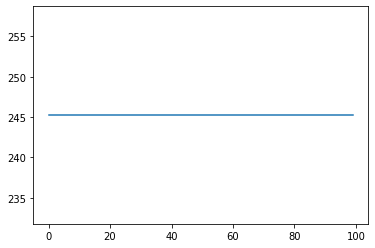

In [102]:
plt.plot(apt)

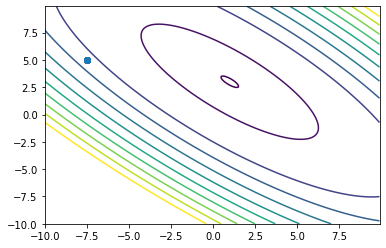

In [103]:
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

In [26]:
X = [-7.5,5]

#e =0.08

aptn = list([])
soln = list([])

for i in range(100):
    aptn.append(booth(X))
    soln.append(list(X))
    
    Hinv = np.linalg.inv(hbooth(X))
    X_next = X - Hinv@np.array(dbooth(X))
    
    X = X_next

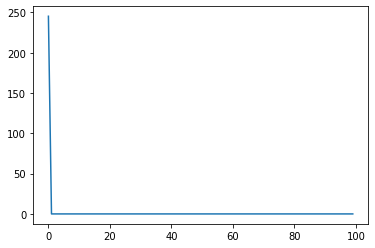

In [27]:
plt.plot(aptn)

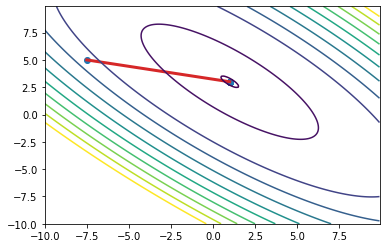

In [28]:
plt.scatter(np.array(soln)[:,0], np.array(soln)[:,1])
plt.plot(np.array(soln)[:,0], np.array(soln)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

https://towardsdatascience.com/optimization-eye-pleasure-78-benchmark-test-functions-for-single-objective-optimization-92e7ed1d1f12